- https://pytorch.org/hub/ultralytics_yolov5/
- https://dipankarmedh1.medium.com/real-time-object-detection-with-yolo-and-webcam-enhancing-your-computer-vision-skills-861b97c78993

In [1]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.4/616.4 kB 6.7 MB/s eta 0:00:00


In [2]:
import torch
from google.colab import files

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 80.8 MB/s eta

In [4]:
uploaded = files.upload()

Saving oaxaca-city-center-1024x683.jpg to oaxaca-city-center-1024x683.jpg
Saving street_dogs_bicycle_people.jpg to street_dogs_bicycle_people.jpg


In [5]:
imgs = ['/content/street_dogs_bicycle_people.jpg', '/content/oaxaca-city-center-1024x683.jpg']

In [6]:
results = model(imgs)

image 1/2: 493x740 11 persons, 2 bicycles, 4 traffic lights, 3 dogs, 1 backpack, 4 umbrellas, 4 chairs
image 2/2: 683x1024 2 persons, 1 car, 1 bird, 1 potted plant
Speed: 107.0ms pre-process, 751.5ms inference, 18.2ms NMS per image at shape (2, 3, 448, 640)


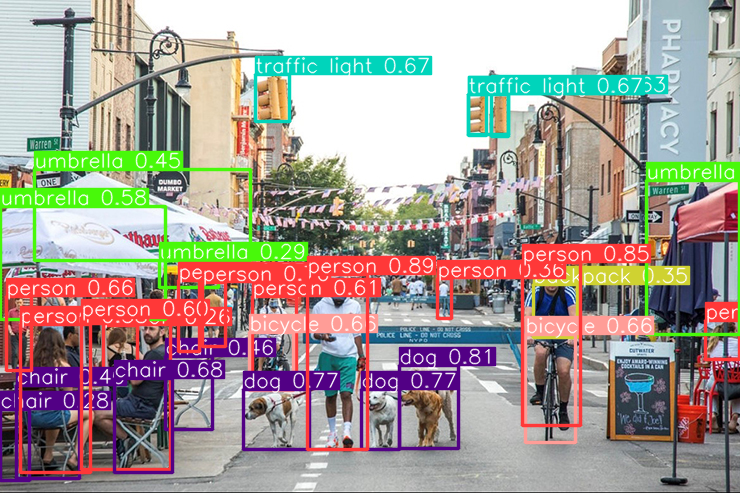

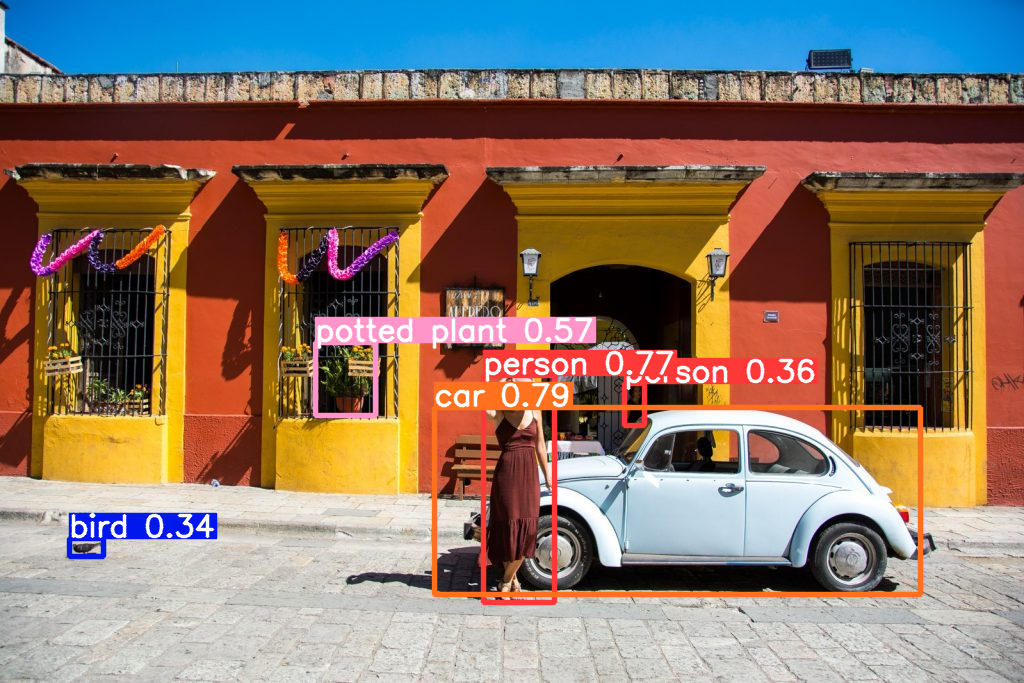

In [7]:
results.print()
results.show()

In [8]:
results.pandas().xyxy[1]

,xmin,ymin,xmax,ymax,confidence,class,name
0,434.814209,407.326996,920.014038,594.692932,0.790846,2,car
1,483.357086,375.286865,554.883179,602.330811,0.771256,0,person
2,315.945892,342.534485,375.421295,415.923645,0.571009,58,potted plant
3,624.895203,383.211273,644.338074,425.958252,0.356879,0,person
4,69.489525,538.741821,103.266495,556.603760,0.342459,14,bird


## Real-time Object Detection

In [9]:
!pip install opencv-python

In [10]:
import cv2
from google.colab.patches import cv2_imshow

In [37]:
from ultralytics import YOLO
import math

In [19]:
model = YOLO('yolo-weights/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 111MB/s]


In [20]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [40]:
# Specifies which camera to open (if multiple cameras)
vc = cv2.VideoCapture(0)
vc.set(3, 640)
vc.set(4, 480)

while True:
    # success: Boolean (indicates if the frame was read successfully)
    # read a frame from the camera and store it in the 'img' variable
    success, img = vc.read()
    results = model(img, stream=True)

    # Coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # Bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # Confidence
            confidence = math.ceil((box.conf[0] * 100)) / 100
            print('Confidence ---> ', confidence)

            # Class name
            cls = int(box.cls[0])
            print('Class Name ---> ', classNames[cls])

            # Object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontscale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontscale, color,
                        thickness)


    cv2_imshow(img)

    if cv2.waitKey(1) == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 210.8ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 144.2ms
Speed: 7.9ms preprocess, 177.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Confidence --->  0.88
Class Name --->  bus
Confidence --->  0.87
Class Name --->  person
Confidence --->  0.86
Class Name --->  person
Confidence --->  0.83
Class Name --->  person
Confidence --->  0.27
Class Name --->  person
Confidence --->  0.26
Class Name --->  stop sign
Confidence --->  0.84
Class Name --->  person
Confidence --->  0.82
Class Name --->  person
Confidence --->  0.3
Class Name --->  tie


AttributeError: ignored